In [1]:
import numpy as np

import torch
from torch import nn

%matplotlib inline
from matplotlib import pyplot as plt

import cv2
import numpy as np
from pathlib import Path
from PIL import Image

In [11]:
n_epochs = 20
iter_per_epoch = 149
iters_done = np.linspace(iter_per_epoch, iter_per_epoch * n_epochs, n_epochs)

In [14]:
exp_06_17_53 = {
    'train': np.float32([1417.626893939394, 1428.6348905723905, 1384.1016414141413, 1414.1308922558921, 1411.2628367003367, 1560.111111111111, 1396.0992213804714, 1411.6637205387206, 1389.0784932659933, 1399.1584595959596, 1392.8040824915824, 1464.0223063973065, 1418.9170875420875, 1409.0128367003367, 1419.2274831649831, 2247.1736111111113, 1442.0064183501684, 1417.5638678451178, 2237.431818181818, 1893.4922138047139]),
    'eval': np.float32([791.7299403943146, 765.363709307657, 746.8823933975241, 713.126146263182, 709.3023842274187, 706.83035304906, 765.0421824850986, 732.1218477762494, 788.3492090784044, 812.9158069692802, 1226.671366345713, 750.0017193947731, 764.5414947271894, 1125.0193718477763, 930.6793901879871, 702.9150045850528, 864.239225126089, 779.0245873452544, 782.8419303071985, 894.836542870243])
}

exp_06_20_33 = {
    'train': np.float32([1493.3261784511785, 1447.7656776094277, 1387.421611952862, 1475.0252525252524, 1404.924031986532, 1488.700441919192, 1401.9119318181818, 1423.7446338383838, 1968.8943602693603, 1371.673085016835, 1454.4722222222222, 1587.225904882155, 1499.2900883838383, 1431.4377104377104, 1378.0335648148148, 1423.2078072390573, 1405.8280723905723, 1426.248106060606, 1404.8752104377104, 1648.75]),
    'eval': np.float32([677.9648097203118, 788.6662081613939, 772.1112448418157, 745.4347203117836, 1170.9115084823475, 721.8747707473636, 744.9497363594681, 771.8993007794589, 732.4604539202201, 705.9832072443833, 760.863709307657, 855.9672168729941, 760.4910591471802, 731.9348349381017, 762.8016964695094, 698.8861187528656, 746.1754928931683, 1036.5596056854654, 830.3117835855112, 835.2899472718937])
}

exp_06_22_35 = {
    'train': np.float32([1856.0909090908, 1338.5801767676767, 1402.707702020202, 1343.1226851851852, 1350.1064814814815, 1346.6770833333333, 1378.069234006734, 1352.2045454545455, 1320.901936026936, 1376.0648148148148, 1483.5728114478115, 1318.3367003367002, 1505.2891414141413, 1353.189393939394, 1301.5378787878788, 1289.48547979798, 1325.9774831649831, 1326.4924242424242, 1296.9490740740741, 1280.4025673400674]),
    'eval': np.float32([698.428129298487, 754.5511233379184, 613.3396950939936, 759.5966872994039, 620.4483035304906, 990, 702.4779917469051, 562.3380330123797, 611.8607290233838, 575.6047684548372, 542.2577945896378, 572.0142136634571, 546.5386290692343, 472.09244612563043, 481.66271205868867, 931.8524759284732, 450.1439993122421, 444.03476043099494, 445.51192113709305, 428.8769199908299])
}

exp_07_09_54 = {
    'train': np.float32([1454.04577020202, 1686.3847853535353, 2204.808080808081, 1612.0420875420875, 1418.6472011784513, 1405.2272727272727, 1511.793665824916]),
    'eval': np.float32([757.7632966529115, 771.0016047684549, 720.6506189821183, 760.985270518111, 759.9047455295736, 888.2809491059147, 1050.8341357175607])
}

exp_07_14_39 = {
    'train': np.float32([]),
    'eval': np.float32([])
}

In [4]:
def plot_metrics(axis, metrics, iters):
    done = len(metrics['train'])
    axis.plot(iters[:done], metrics['train'] / 4.0, label='average on TRAIN set (S1, S6, S7, S8)')

    done = len(metrics['eval'])
    axis.plot(iters[:done], metrics['eval'] / 2.0, label='average on EVAL set (S9, S11)')

In [5]:
def get_figsize(n_rows, n_cols):
    row_size = 5  # heigth
    column_size = 20  # width

    return (n_cols * column_size, n_rows * row_size)


def get_figa(n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols, figsize=get_figsize(n_rows, n_cols))
    return fig, ax

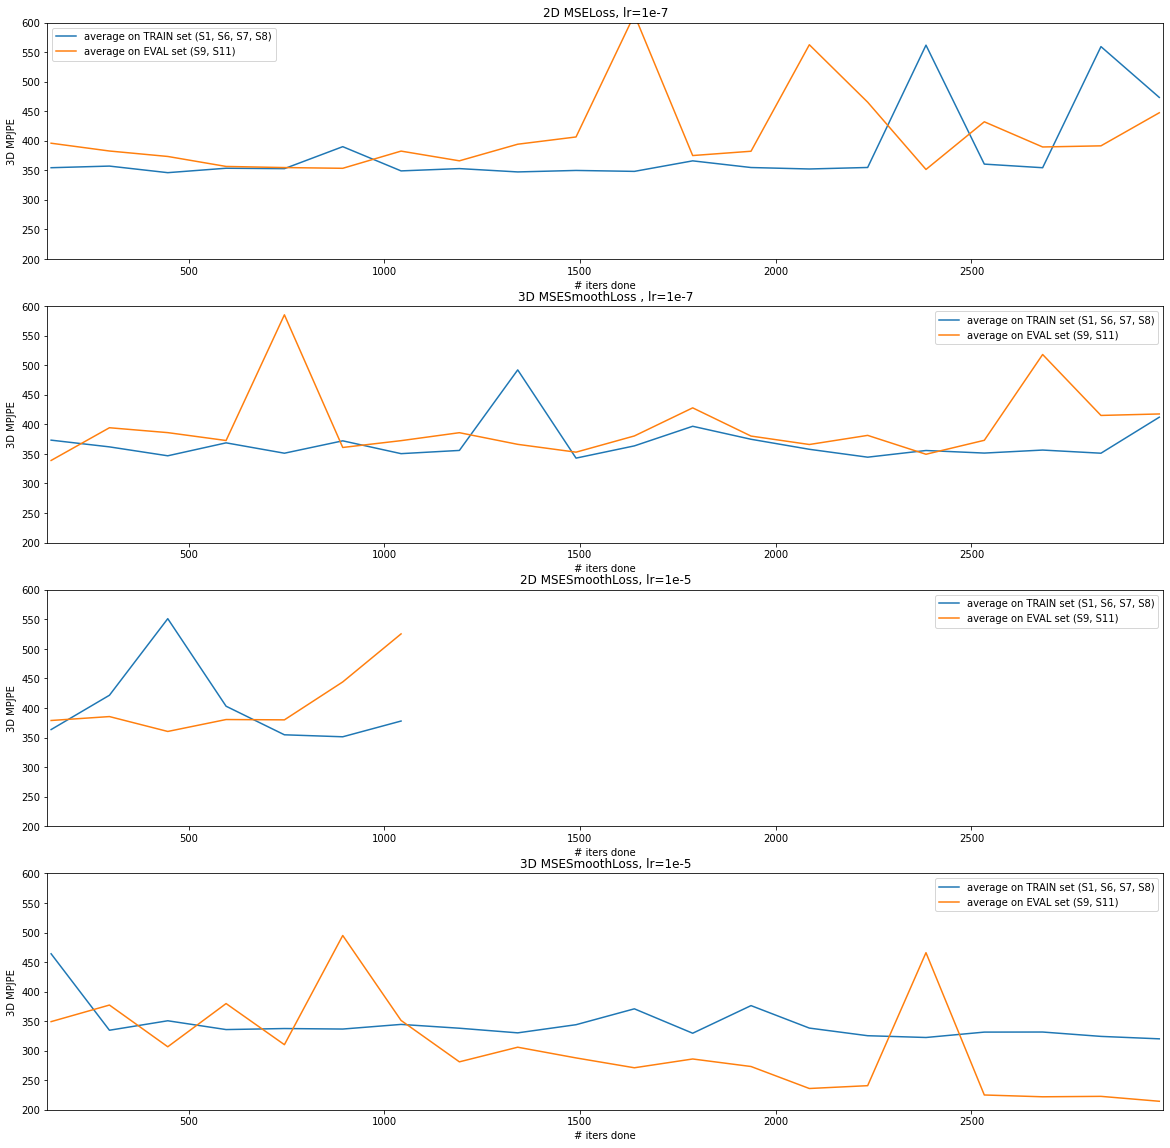

In [15]:
fig, ax = get_figa(4, 1)

for axis, metrics, title in zip(
        ax.ravel(),
        [ exp_06_17_53, exp_06_20_33, exp_07_13_09, exp_06_22_35 ],
        [ '2D MSELoss, lr=1e-7', '3D MSESmoothLoss , lr=1e-7', '2D MSESmoothLoss, lr=2e-6', '3D MSESmoothLoss, lr=1e-5']
    ):
    plot_metrics(axis, metrics, iters_done)

    axis.set_ylim([200, 600])
    axis.set_xlim([ iters_done[0] - 10, iters_done[-1] + 10 ])

    axis.set_ylabel('3D MPJPE')
    axis.set_xlabel('# iters done')
    
    axis.set_title(title)

    axis.legend()

In [7]:
src_folder = Path('~/_tmp/tesi').expanduser()

kp_gt = np.load(src_folder / 'kp_gt.np.npy')
kp_pred = np.load(src_folder / 'kp_pred.np.npy')
images_batch = np.load(src_folder / 'wow.np.npy')

images_batch.shape

(8, 4, 3, 128, 128)

In [8]:
def normalize_transformation(feature_range):
    def _f(x):
        shape = x.shape
        
        m = x.min()
        M = x.max()
        
        x = (x - m) / (M - m) * (feature_range[1] - feature_range[0]) + feature_range[0]
        
        x = x.reshape(shape)  # original size
        return x

    return _f

In [9]:
canvas = images_batch[0, 0, 0].copy().reshape(128, 128)
canvas = normalize_transformation((0, 255))(canvas)
canvas = cv2.cvtColor(canvas, cv2.COLOR_GRAY2RGB)

# plt.imshow(canvas)

for pt in kp_gt:
    cv2.circle(
        canvas, tuple(pt.astype(int)),
        2, color=(0, 0, 255), thickness=3
    )

for pt in kp_pred:
    cv2.circle(
        canvas, tuple(pt.astype(int)),
        2, color=(0, 255, 0), thickness=3
    )
    
cv2.imwrite(str(src_folder / 'diocan.jpg'), canvas)

True